In [11]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
sns.set(font_scale=1.4)

In [2]:
conn = sqlite3.connect('microdados_enem2017/database.db')

In [3]:
df1 = pd.read_sql('SELECT nu_nota_mt,tp_cor_raca,q006 FROM enem WHERE tp_cor_raca=1 or tp_cor_raca=4', conn).apply(pd.to_numeric)

In [4]:
df1

,NU_NOTA_MT,TP_COR_RACA,Q006
0,465.5,1,3
1,591.2,1,3
2,578.5,1,9
3,645.1,1,4
4,425.5,1,1
5,430.8,1,0
6,481.7,1,2
7,769.1,1,8
8,790.4,1,3
9,500.6,1,3


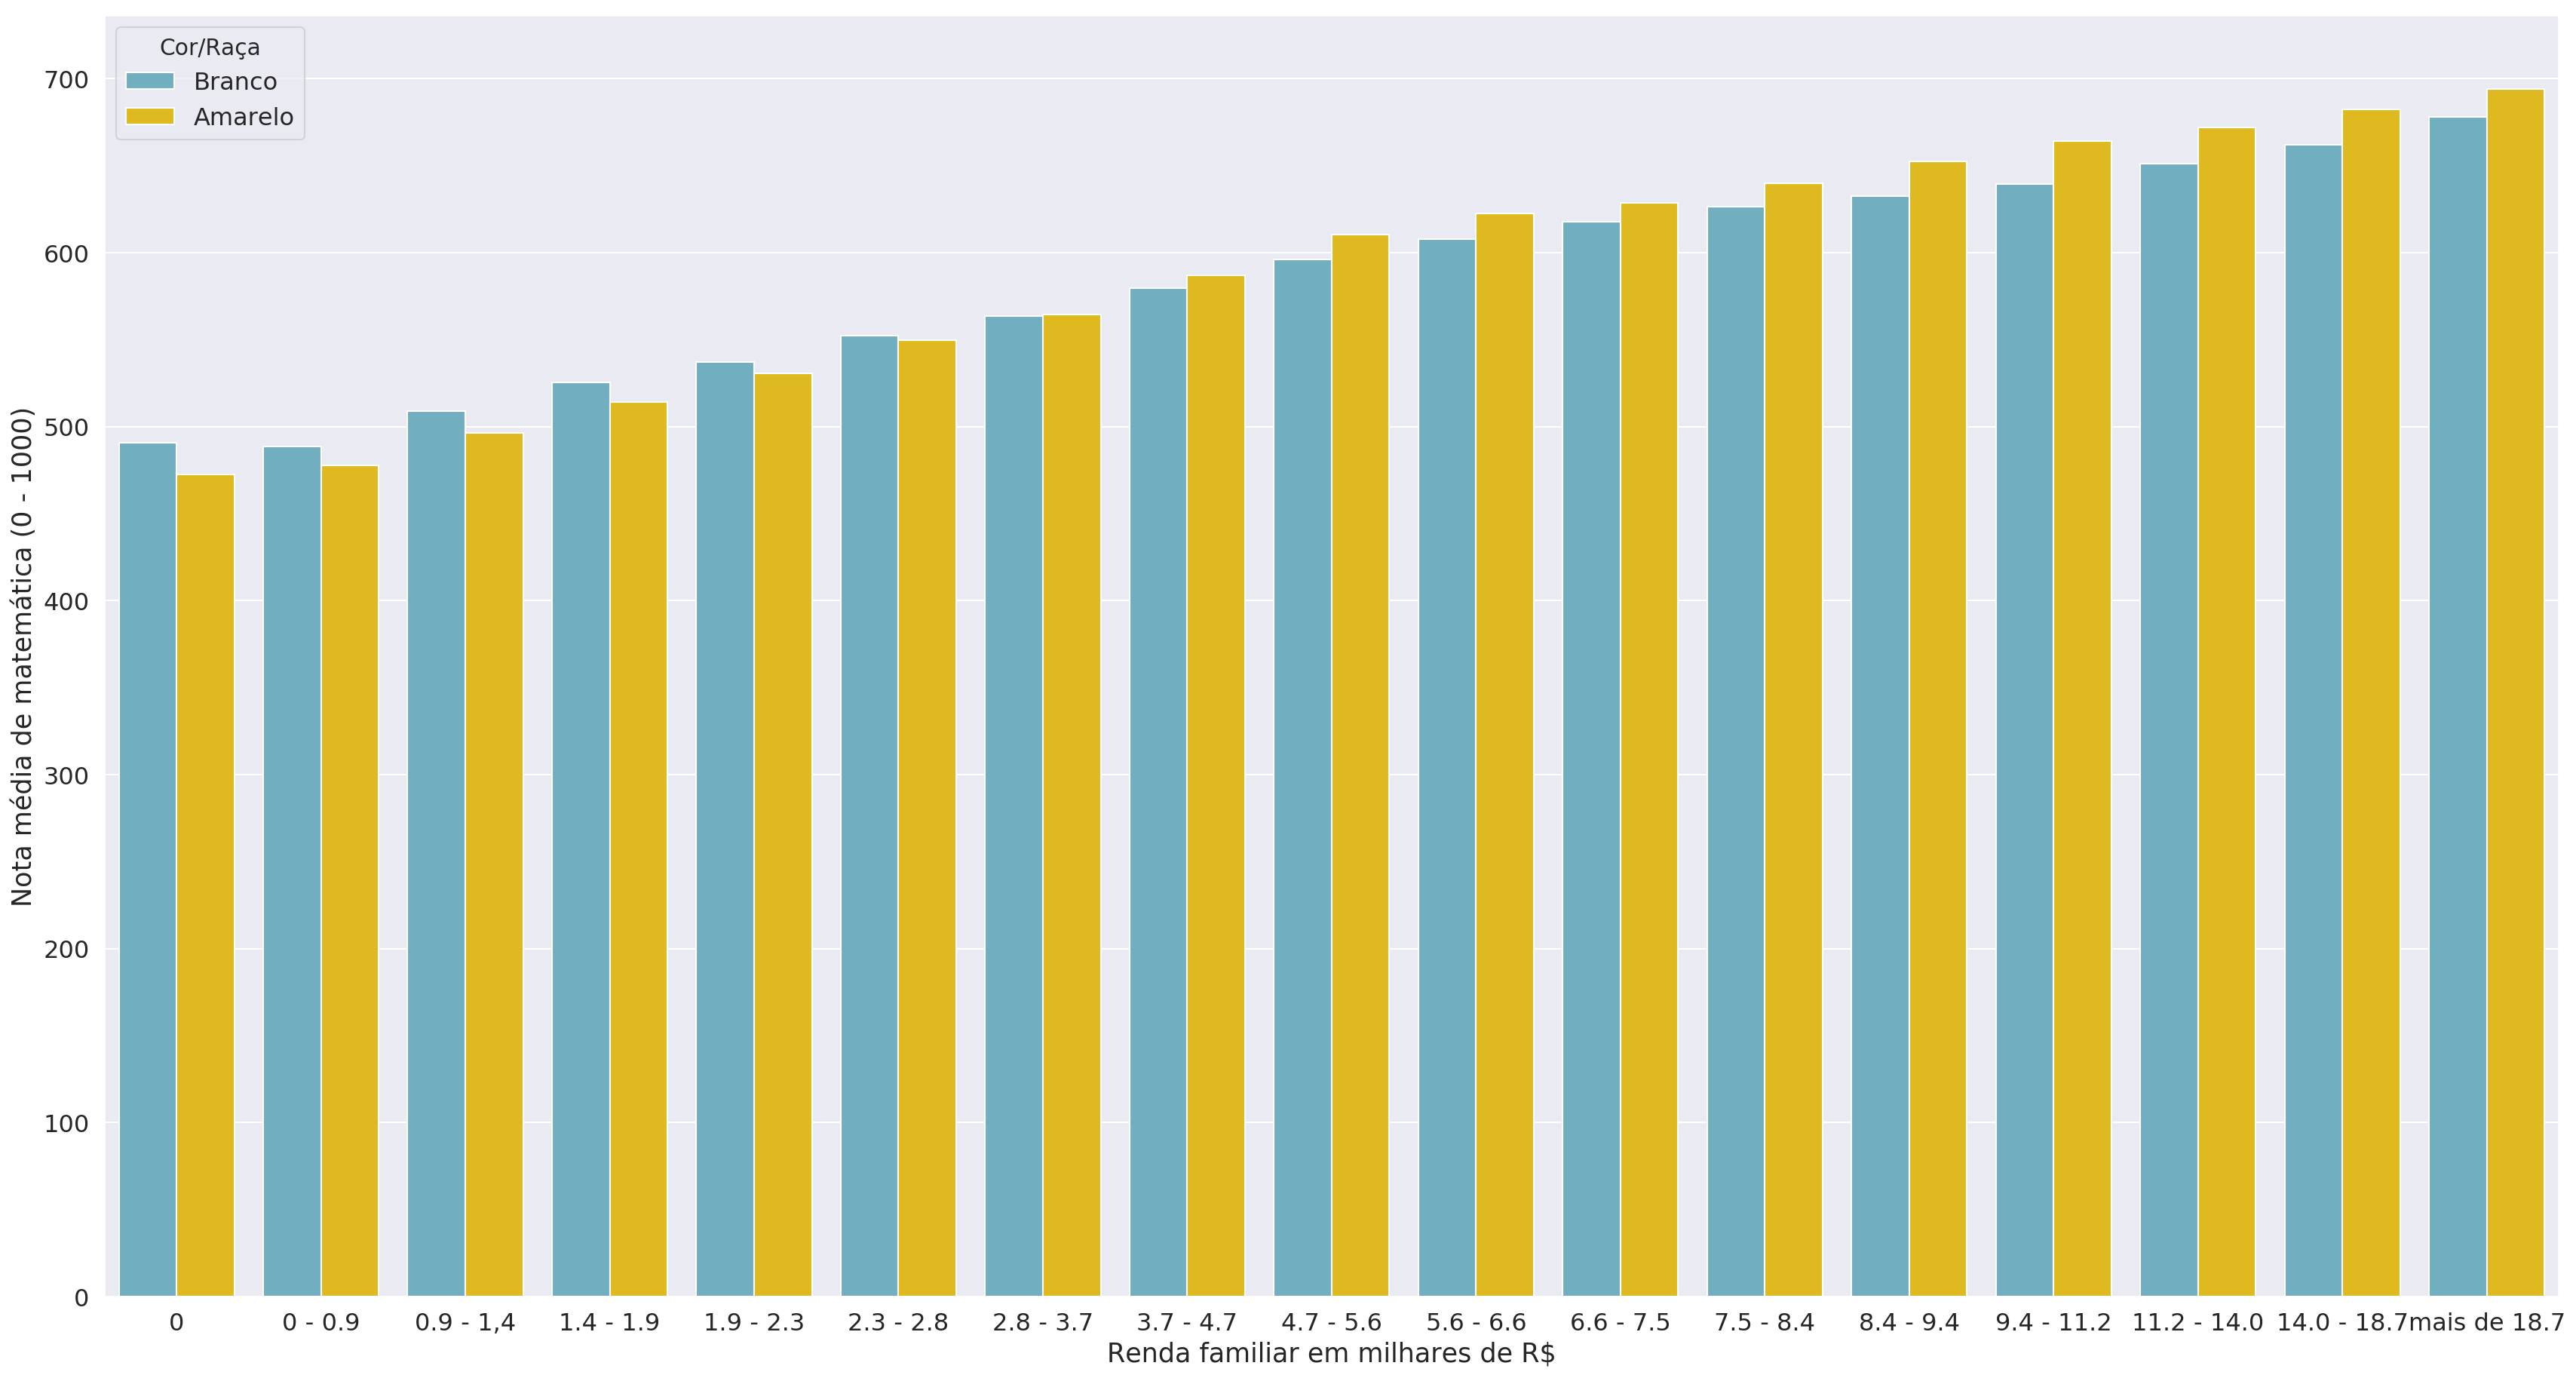

In [12]:
fig, ax = plt.subplots(figsize=(28,15))
g = sns.barplot(x='Q006', y='NU_NOTA_MT', hue='TP_COR_RACA', data=df1, hue_order=[1,4], errwidth=0,
                palette=['c', '#ffcc00'], ax=ax)

g.set(xlabel ="Renda familiar em milhares de R$", ylabel ="Nota média de matemática (0 - 1000)",
       xticklabels =["0", 
                     "0 - 0.9", 
                     "0.9 - 1,4", 
                     "1.4 - 1.9", 
                     "1.9 - 2.3", 
                     "2.3 - 2.8", 
                     "2.8 - 3.7", 
                     "3.7 - 4.7", 
                     "4.7 - 5.6",
                     "5.6 - 6.6",
                     "6.6 - 7.5",
                     "7.5 - 8.4",
                     "8.4 - 9.4",
                     "9.4 - 11.2",
                     "11.2 - 14.0",
                     "14.0 - 18.7",
                     "mais de 18.7"])

legend = g.get_legend()

legend.set_title('Cor/Raça')
for t, l in zip(legend.texts,('Branco', 'Amarelo')):
    t.set_text(l)

In [13]:
brancos = df1[df1['TP_COR_RACA'] == 1]
amarelos = df1[df1['TP_COR_RACA'] == 4]

In [14]:
len(brancos),len(amarelos)

(1619098, 102304)

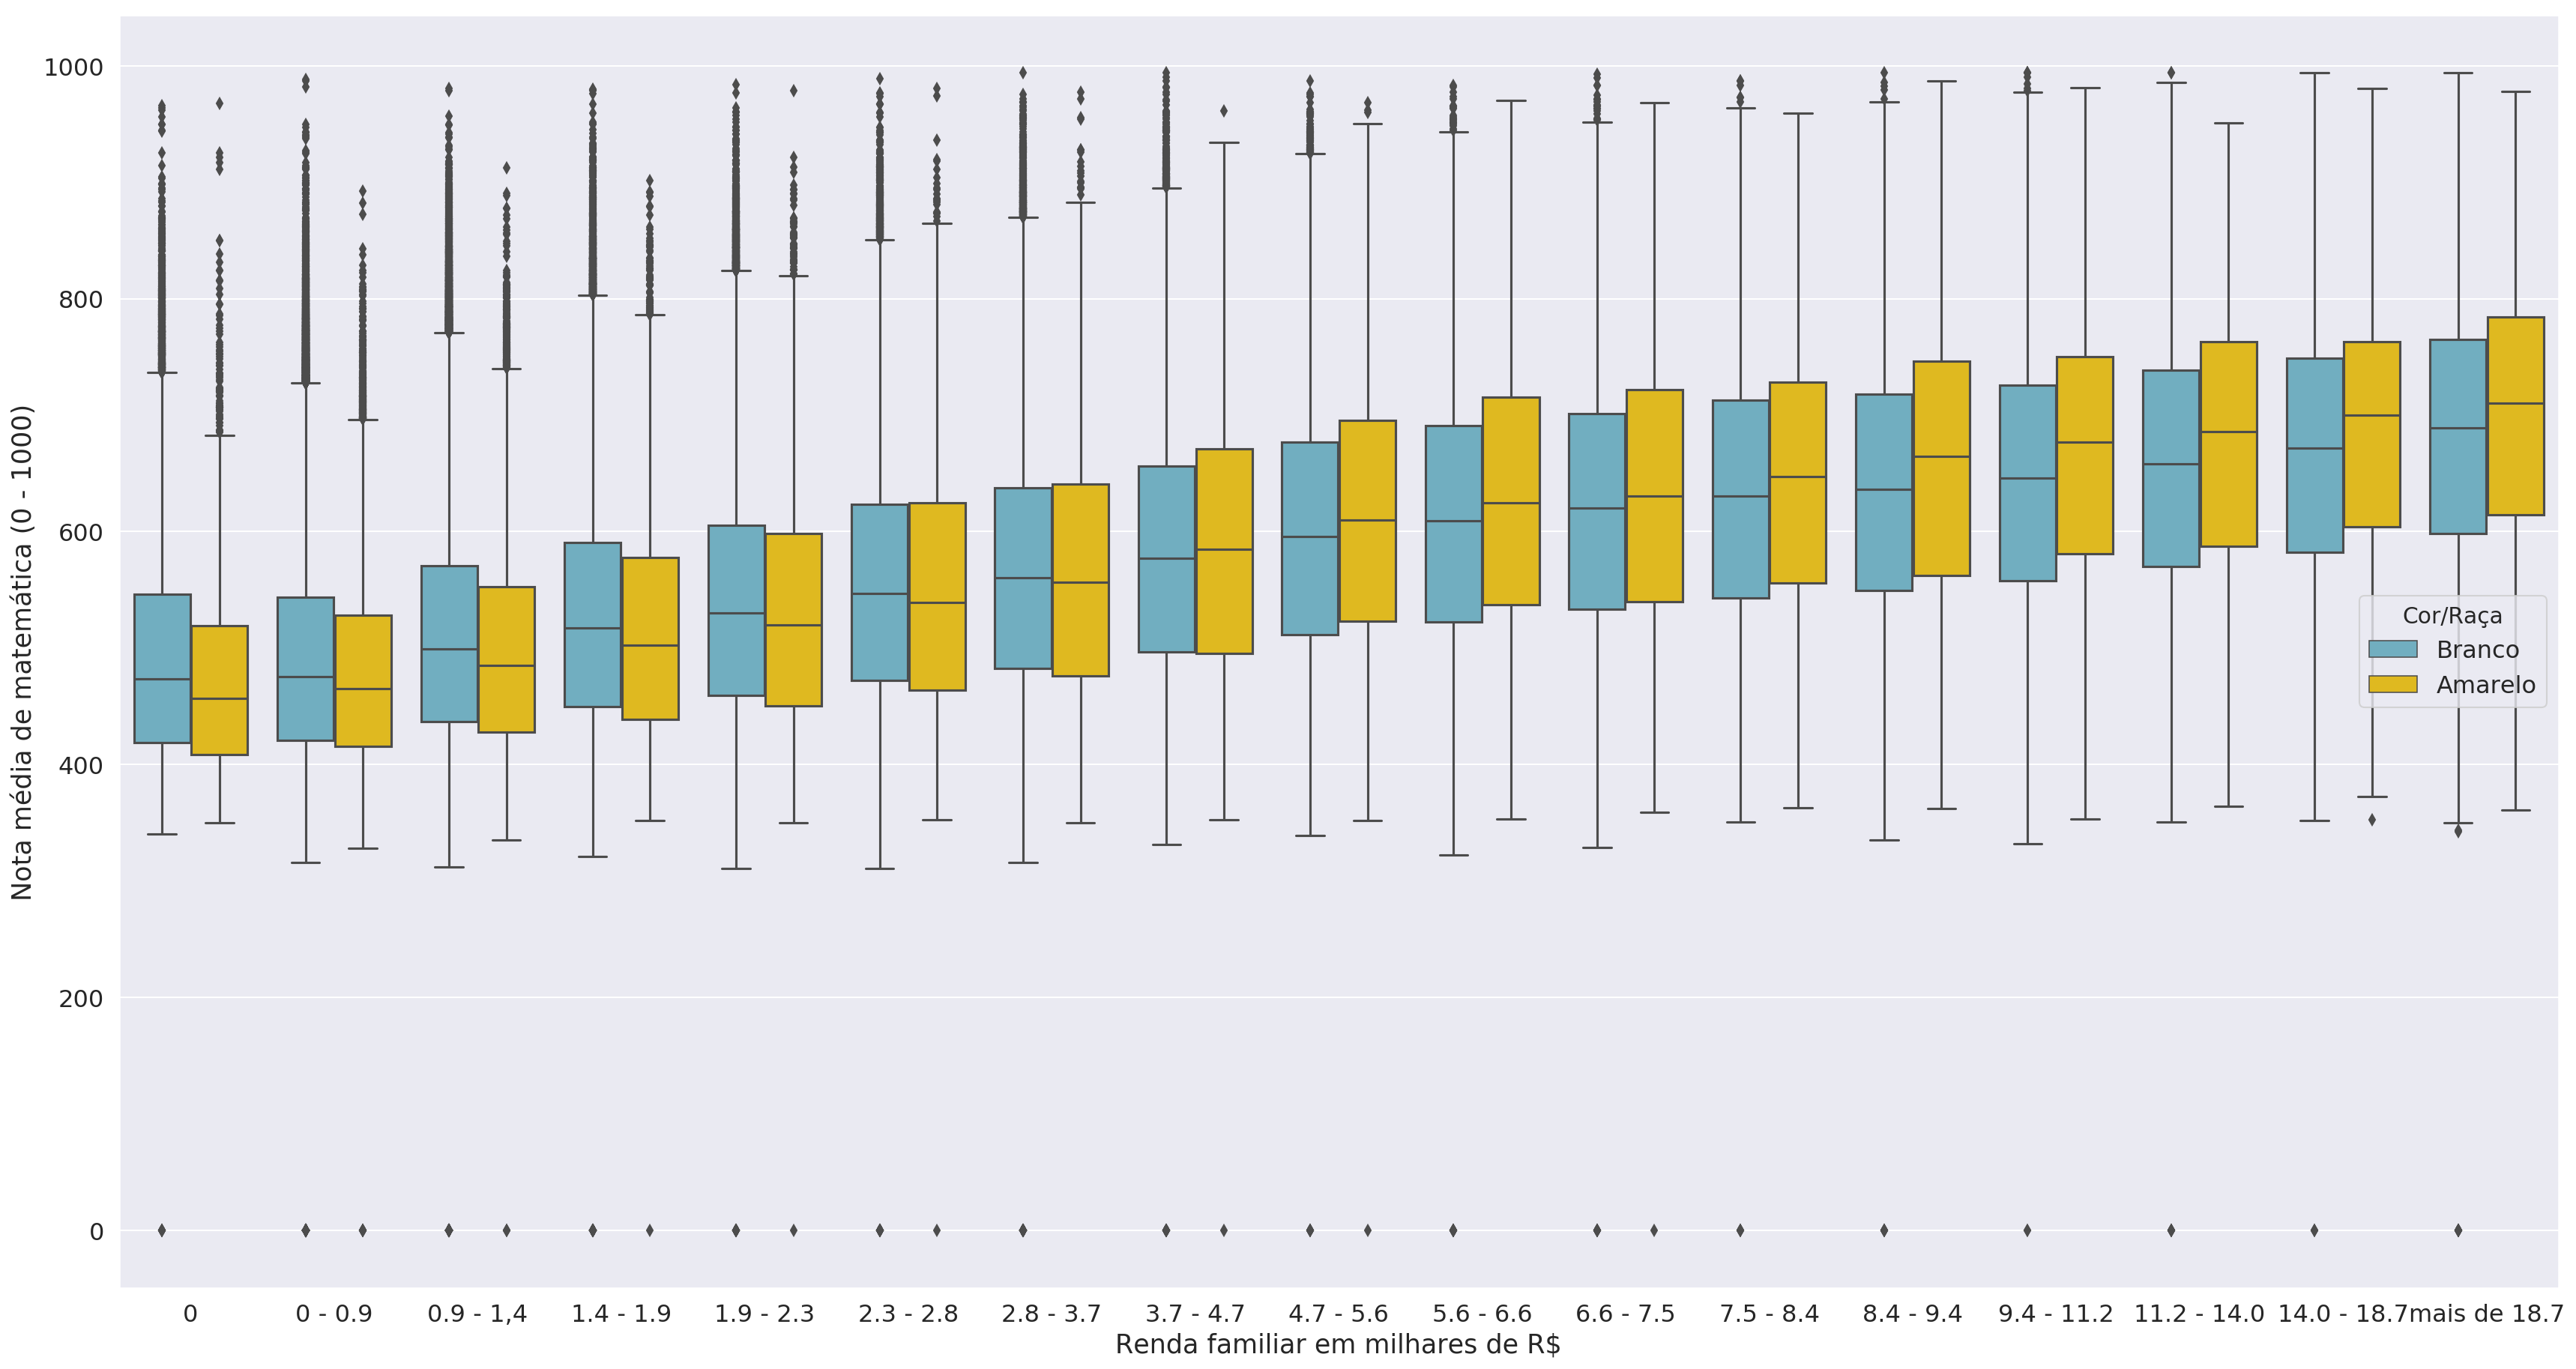

In [15]:
fig, ax = plt.subplots(figsize=(28,15))
g = sns.boxplot(x='Q006', y='NU_NOTA_MT', hue='TP_COR_RACA', data=df1, hue_order=[1,4],
                palette=['c', '#ffcc00'], ax=ax)

g.set(xlabel ="Renda familiar em milhares de R$", ylabel ="Nota média de matemática (0 - 1000)",
       xticklabels =["0", 
                     "0 - 0.9", 
                     "0.9 - 1,4", 
                     "1.4 - 1.9", 
                     "1.9 - 2.3", 
                     "2.3 - 2.8", 
                     "2.8 - 3.7", 
                     "3.7 - 4.7", 
                     "4.7 - 5.6",
                     "5.6 - 6.6",
                     "6.6 - 7.5",
                     "7.5 - 8.4",
                     "8.4 - 9.4",
                     "9.4 - 11.2",
                     "11.2 - 14.0",
                     "14.0 - 18.7",
                     "mais de 18.7"])

legend = g.get_legend()

legend.set_title('Cor/Raça')
for t, l in zip(legend.texts,('Branco', 'Amarelo')):
    t.set_text(l)